In [2]:
import pandas as pd
import re

### 한국어 리뷰 데이터 가져오기

In [9]:
comment_path1 = '../csv/total_review.csv'
comment_path2 = '../csv/trans_extractdf.csv'

df1 = pd.read_csv(comment_path1)
df2 = pd.read_csv(comment_path2)
airbnb_review_data = pd.concat([df1, df2])
airbnb_review_data.reset_index(drop=True, inplace = True)
airbnb_review_data

c:\Users\User\anaconda3\envs\yun_env\lib\site-packages\IPython\core\interactiveshell.py:3269: DtypeWarning: Columns (0,1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,listing_id,host_id,host_name,host_is_superhost,neighbourhood_cleansed,accommodates,bedrooms,beds,price,minimum_nights,first_review,last_review,review_scores_rating,reviewer_id,date,comments,kr_comments
0,197677,964081,Yoshimi & Marek,t,Sumida Ku,2.0,1.0,2.0,"$11,000.00",3.0,2011-09-21,2023-05-30,4.78,1002142.0,2011-09-21,Couldnt get any betterThe apartment itself is ...,더할 나위 없이 아파트 자체가 훌륭하고 필요한 모든 것이 갖춰져 있습니다. 게다가 ...
1,197677,964081,Yoshimi & Marek,t,Sumida Ku,2.0,1.0,2.0,"$11,000.00",3.0,2011-09-21,2023-05-30,4.78,1031940.0,2011-10-14,The apartment is bigger than it looks in the p...,아파트는 사진에서 보이는 것보다 더 넓습니다. 커플에게 적합합니다. 깨끗하고 잘 관...
2,197677,964081,Yoshimi & Marek,t,Sumida Ku,2.0,1.0,2.0,"$11,000.00",3.0,2011-09-21,2023-05-30,4.78,1097040.0,2011-11-21,The appartement is perfect for a couple It is ...,아파트는 커플에게 적합합니다. 조금 작지만 정말 완벽한 가구가 그것을 보완합니다. ...
3,197677,964081,Yoshimi & Marek,t,Sumida Ku,2.0,1.0,2.0,"$11,000.00",3.0,2011-09-21,2023-05-30,4.78,1183674.0,2011-11-30,We had a terrific stay at Yoshimi and Mareks l...,요시미와 마렉의 사랑스러운 아파트에서 즐거운 시간을 보냈습니다. 모든 것이 새로 정...
4,197677,964081,Yoshimi & Marek,t,Sumida Ku,2.0,1.0,2.0,"$11,000.00",3.0,2011-09-21,2023-05-30,4.78,1538004.0,2012-01-09,We loved our stay at the Oshiage Holiday Apart...,우리는 오시아게 홀리데이 아파트에서의 숙박을 좋아했습니다. 아파트는 매우 좋았고 매...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188389,25871823,2.0429e+07,Mizuki,t,Shinjuku Ku,10.0,3.0,9.0,"$42,143.00",2.0,2018-08-06,2023-06-25,4.98,145757288.0,2018-09-23,非常棒的体验地理位置很方便房东也很好客适合出游的一家人,훌륭한 경험입니다. 위치가 매우 편리합니다. 호스트도 매우 친절합니다. 가족 여행에...
188390,27378720,2.0634e+08,Rintaro,t,Toshima Ku,2.0,1.0,1.0,"$21,000.00",1.0,2018-08-31,2023-06-16,4.87,92871039.0,2019-01-10,最初から最後まで丁寧な対応をしていただき今回の最後の旅行の宿に決めて大正解でしたお部屋は二人...,처음부터 끝까지 정중한 대응을 해 주셔서 이번 마지막 여행의 숙소로 결정해 대정해였...
188391,34581295,2.29062e+08,Kenta,f,Shibuya Ku,12.0,2.0,6.0,"$74,286.00",1.0,2019-05-19,2023-06-01,4.77,38501607.0,2022-05-31,とても快適なお部屋でしたありがとうございました,매우 편안한 방이었습니다. 고마워요.
188392,34843191,3.93144e+07,Masahiro,f,Bunkyo Ku,2.0,1.0,1.0,"$8,429.00",2.0,2019-06-10,2023-06-25,4.57,316941852.0,2019-12-23,,NaN


In [10]:
airbnb_review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188394 entries, 0 to 188393
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   listing_id              188394 non-null  object 
 1   host_id                 188389 non-null  object 
 2   host_name               188386 non-null  object 
 3   host_is_superhost       171061 non-null  object 
 4   neighbourhood_cleansed  188386 non-null  object 
 5   accommodates            188386 non-null  float64
 6   bedrooms                153126 non-null  float64
 7   beds                    180731 non-null  float64
 8   price                   188386 non-null  object 
 9   minimum_nights          188386 non-null  float64
 10  first_review            188386 non-null  object 
 11  last_review             188386 non-null  object 
 12  review_scores_rating    188386 non-null  float64
 13  reviewer_id             188386 non-null  float64
 14  date                

#### 중복, Null 데이터 제거 

In [12]:
# NULL 데이터 제거 
print(airbnb_review_data['kr_comments'].isnull().sum())
airbnb_review_data = airbnb_review_data.dropna(subset=['kr_comments'])
airbnb_review_data.reset_index(drop=True, inplace=True)
airbnb_review_data['kr_comments'].isnull().sum()

3446


0

In [13]:
#  'listing_id','reviewer_id', 'comments', 'date'], keep='first' 기준 중복데이터 제거 
airbnb_review_data = airbnb_review_data.drop_duplicates(subset=['listing_id','reviewer_id', 'comments', 'date'], keep='first').reset_index(drop=True)


In [14]:
airbnb_review_data.to_csv('total_translate_review.csv')

In [15]:
comment_data = airbnb_review_data['kr_comments']
comment_data

0         더할 나위 없이 아파트 자체가 훌륭하고 필요한 모든 것이 갖춰져 있습니다. 게다가 ...
1         아파트는 사진에서 보이는 것보다 더 넓습니다. 커플에게 적합합니다. 깨끗하고 잘 관...
2         아파트는 커플에게 적합합니다. 조금 작지만 정말 완벽한 가구가 그것을 보완합니다. ...
3         요시미와 마렉의 사랑스러운 아파트에서 즐거운 시간을 보냈습니다. 모든 것이 새로 정...
4         우리는 오시아게 홀리데이 아파트에서의 숙박을 좋아했습니다. 아파트는 매우 좋았고 매...
                                ...                        
184941                                         바로 밖에서 좋은 음식
184942    집은 역에서 멀지 않고 근처에 레스토랑이 많습니다. 체크인과 체크아웃이 매우 편리합...
184943    훌륭한 경험입니다. 위치가 매우 편리합니다. 호스트도 매우 친절합니다. 가족 여행에...
184944    처음부터 끝까지 정중한 대응을 해 주셔서 이번 마지막 여행의 숙소로 결정해 대정해였...
184945                                 매우 편안한 방이었습니다. 고마워요.
Name: kr_comments, Length: 184946, dtype: object

### 코멘트 데이터 전처리

In [16]:
def preprocessed(text):
    # 한국어 텍스트만 남기고 나머지는 공백으로 대체
    text = re.sub(r'[^가-힣 ]', ' ', text)
    # 작은따옴표(') 제거
    text = text.replace("'", '')
    # 연속된 공백을 하나의 공백으로 대체하고 양쪽 공백 제거
    text = ' '.join(text.split())

    return text

In [17]:
filtered_comment = list(map(preprocessed, comment_data))
filtered_comment[:10]

['더할 나위 없이 아파트 자체가 훌륭하고 필요한 모든 것이 갖춰져 있습니다 게다가 동네 자체가 매우 친절하다는 점 외에도 가족 생활의 에너지가 가득합니다 슈퍼마켓과 일부 편의점 및 기차역이 정말 가깝습니다 처음부터 집처럼 느껴질 것입니다 쉽게 구할 수 있는 물건을 포장하다',
 '아파트는 사진에서 보이는 것보다 더 넓습니다 커플에게 적합합니다 깨끗하고 잘 관리되어 있고 안전하며 유용한 정보가 많이 있습니다 서양인으로서 우리는 다다미 바닥에서 이상한 냄새가 난다는 것을 알았지만 나중에 모든 다다미 방에서 같은 냄새가 난다는 것을 알게 되었습니다 지하철역에서 도보로 약 분 거리에 위치 이 노선에서는 패스가 유효하지 않으며 슈퍼마켓 상점과 레스토랑에서 도보 거리에 있습니다 전반적으로 좋은 경험을 했으며 도쿄를 여행하는 모든 사람에게 추천합니다',
 '아파트는 커플에게 적합합니다 조금 작지만 정말 완벽한 가구가 그것을 보완합니다 일상 생활에 필요한 모든 것이 제공됩니다 우리는 또한 동네를 많이 즐겼으며 주요 도시와 가까운 매력적인 장소입니다 머무르게 해주셔서 감사합니다 다시 방문하겠습니다',
 '요시미와 마렉의 사랑스러운 아파트에서 즐거운 시간을 보냈습니다 모든 것이 새로 정리되고 정돈되어 있었으며 우리에게 필요한 모든 편안함과 편리함이 갖춰져 있었습니다 그들이 우리에게 남겨준 생존 키트에는 집과 동네에 대한 정보가 가득했고 긴급 전화번호까지 포함되어 있었습니다 다른 임대 숙소에서는 볼 수 없었던 기타 세부 사항 이 아파트는 미국 표준에 비해 규모가 작은 일본식이지만 모든 것이 잘 설계되어 우리 인 가족이 꽤 편안했습니다 동네가 특별히 그림처럼 아름답지는 않았지만 확실히 편리하고 흥미로웠습니다 훌륭한 가치와 훌륭한 숙박',
 '우리는 오시아게 홀리데이 아파트에서의 숙박을 좋아했습니다 아파트는 매우 좋았고 매우 편안하고 흠집이 없었습니다 스미다강과 아사쿠사가 가깝고 새로운 도쿄 스카이트리 바로 아래에 있는 위치가 정말 마음에 들었습니다 동네는 매우 조용하고 평화롭지만

In [18]:
len(comment_data)

184946

### 문장 형태소 분석 - Kiwipiepy
Kiwipiepy는 한국어 형태소 분석기인 Kiwi(Korean Intelligent Word Identifier)의 Python 모듈

In [9]:
!pip install --upgrade pip
!pip install kiwipiepy

  Obtaining dependency information for kiwipiepy from https://files.pythonhosted.org/packages/48/fd/2952dcbc4423b829b50f78b6bcc5902281580e76cf2717a8bc365735e06b/kiwipiepy-0.16.0-cp38-cp38-win_amd64.whl.metadata
     ---------------------------------------- 0.0/30.8 MB ? eta -:--:--
     ---------------------------------------- 0.1/30.8 MB 2.6 MB/s eta 0:00:12
     ---------------------------------------- 0.3/30.8 MB 6.5 MB/s eta 0:00:05
      --------------------------------------- 0.6/30.8 MB 4.5 MB/s eta 0:00:07
     - -------------------------------------- 1.3/30.8 MB 7.5 MB/s eta 0:00:04
     -- ------------------------------------- 1.9/30.8 MB 8.3 MB/s eta 0:00:04
     --- ------------------------------------ 2.6/30.8 MB 9.3 MB/s eta 0:00:04
     --- ------------------------------------ 3.0/30.8 MB 9.6 MB/s eta 0:00:03
     ----- ---------------------------------- 3.9/30.8 MB 10.3 MB/s eta 0:00:03
     ----- ---------------------------------- 4.1/30.8 MB 9.7 MB/s eta 0:00:03
     

In [19]:
from kiwipiepy import Kiwi

kiwi = Kiwi(model_type='sbg', typos='basic', typo_cost_threshold = 2.5)

### 텍스트 띄어쓰기 교정

In [20]:
space_comments = kiwi.space(comment_data, reset_whitespace=True)
space_comments = list(filtered_comment)
space_comments[:5]

['더할 나위 없이 아파트 자체가 훌륭하고 필요한 모든 것이 갖춰져 있습니다 게다가 동네 자체가 매우 친절하다는 점 외에도 가족 생활의 에너지가 가득합니다 슈퍼마켓과 일부 편의점 및 기차역이 정말 가깝습니다 처음부터 집처럼 느껴질 것입니다 쉽게 구할 수 있는 물건을 포장하다',
 '아파트는 사진에서 보이는 것보다 더 넓습니다 커플에게 적합합니다 깨끗하고 잘 관리되어 있고 안전하며 유용한 정보가 많이 있습니다 서양인으로서 우리는 다다미 바닥에서 이상한 냄새가 난다는 것을 알았지만 나중에 모든 다다미 방에서 같은 냄새가 난다는 것을 알게 되었습니다 지하철역에서 도보로 약 분 거리에 위치 이 노선에서는 패스가 유효하지 않으며 슈퍼마켓 상점과 레스토랑에서 도보 거리에 있습니다 전반적으로 좋은 경험을 했으며 도쿄를 여행하는 모든 사람에게 추천합니다',
 '아파트는 커플에게 적합합니다 조금 작지만 정말 완벽한 가구가 그것을 보완합니다 일상 생활에 필요한 모든 것이 제공됩니다 우리는 또한 동네를 많이 즐겼으며 주요 도시와 가까운 매력적인 장소입니다 머무르게 해주셔서 감사합니다 다시 방문하겠습니다',
 '요시미와 마렉의 사랑스러운 아파트에서 즐거운 시간을 보냈습니다 모든 것이 새로 정리되고 정돈되어 있었으며 우리에게 필요한 모든 편안함과 편리함이 갖춰져 있었습니다 그들이 우리에게 남겨준 생존 키트에는 집과 동네에 대한 정보가 가득했고 긴급 전화번호까지 포함되어 있었습니다 다른 임대 숙소에서는 볼 수 없었던 기타 세부 사항 이 아파트는 미국 표준에 비해 규모가 작은 일본식이지만 모든 것이 잘 설계되어 우리 인 가족이 꽤 편안했습니다 동네가 특별히 그림처럼 아름답지는 않았지만 확실히 편리하고 흥미로웠습니다 훌륭한 가치와 훌륭한 숙박',
 '우리는 오시아게 홀리데이 아파트에서의 숙박을 좋아했습니다 아파트는 매우 좋았고 매우 편안하고 흠집이 없었습니다 스미다강과 아사쿠사가 가깝고 새로운 도쿄 스카이트리 바로 아래에 있는 위치가 정말 마음에 들었습니다 동네는 매우 조용하고 평화롭지만

#### 여러 문장으로 구성된 텍스트 분리

In [21]:
split_result = kiwi.split_into_sents(space_comments, return_tokens = True)
split_result = list(split_result)
split_result[:3]

[[Sentence(text='더할 나위 없이 아파트 자체가 훌륭하고 필요한 모든 것이 갖춰져 있습니다', start=0, end=40, tokens=[Token(form='더', tag='MAG', start=0, len=1), Token(form='하', tag='XSV', start=1, len=1), Token(form='ᆯ', tag='ETM', start=1, len=1), Token(form='나위', tag='NNB', start=3, len=2), Token(form='없이', tag='MAG', start=6, len=2), Token(form='아파트', tag='NNG', start=9, len=3), Token(form='자체', tag='NNG', start=13, len=2), Token(form='가', tag='JKS', start=15, len=1), Token(form='훌륭', tag='XR', start=17, len=2), Token(form='하', tag='XSA', start=19, len=1), Token(form='고', tag='EC', start=20, len=1), Token(form='필요', tag='NNG', start=22, len=2), Token(form='하', tag='XSA', start=24, len=1), Token(form='ᆫ', tag='ETM', start=24, len=1), Token(form='모든', tag='MM', start=26, len=2), Token(form='것', tag='NNB', start=29, len=1), Token(form='이', tag='JKS', start=30, len=1), Token(form='갖추', tag='VV', start=32, len=2), Token(form='어', tag='EC', start=33, len=1), Token(form='지', tag='VX', start=34, len=1), Token(form='어', ta

#### text 와 token을 분리해서 데이터프레임 생성

In [22]:
text = []
token = []
for comment in split_result:
    text.extend([sentence[0] for sentence in comment])
    token.extend([sentence[3] for sentence in comment])


sentence_df = pd.DataFrame(
    {
        'text' : text,
        'token' : token
    }
)

sentence_df.to_csv('kiwi_sentence.csv')
sentence_df.head()

,text,token
0,더할 나위 없이 아파트 자체가 훌륭하고 필요한 모든 것이 갖춰져 있습니다,"[(더, MAG, 0, 1), (하, XSV, 1, 1), (ᆯ, ETM, 1, 1..."
1,게다가 동네 자체가 매우 친절하다는 점 외에도 가족 생활의 에너지가 가득합니다 슈퍼...,"[(게다가, MAG, 41, 3), (동네, NNG, 45, 2), (자체, NNG..."
2,처음부터 집처럼 느껴질 것입니다 쉽게 구할 수 있는 물건을 포장하다,"[(처음, NNG, 114, 2), (부터, JX, 116, 2), (집, NNG,..."
3,아파트는 사진에서 보이는 것보다 더 넓습니다,"[(아파트, NNG, 0, 3), (는, JX, 3, 1), (사진, NNG, 5,..."
4,커플에게 적합합니다 깨끗하고 잘 관리되어 있고 안전하며 유용한 정보가 많이 있습니다,"[(커플, NNG, 25, 2), (에게, JKB, 27, 2), (적합, NNG,..."


#### 명사, 동사, 어근을 분리합니다

In [23]:
nouns = []
verbs = []
neg_verbs = []
radixs = []

for morphs in sentence_df['token']:
    nouns.append([(noun[0], noun[1]) for noun in morphs if noun[1] in ['NNG', 'NNP']])
    neg_verbs.append([morphs for noun in morphs if noun[1] in ['VCN']])
    verbs.append([(verb[0]+'다', verb[1]) for verb in morphs if verb[1] in ['VA', 'VV', 'VX']])
    radixs.append([(verb[0], verb[1]) for verb in morphs if verb[1] in ['XR']])

sentence_df['verbs'] = verbs
sentence_df['nouns'] = nouns
sentence_df['radixs'] = radixs

sentence_df.head()


,text,token,verbs,nouns,radixs
0,더할 나위 없이 아파트 자체가 훌륭하고 필요한 모든 것이 갖춰져 있습니다,"[(더, MAG, 0, 1), (하, XSV, 1, 1), (ᆯ, ETM, 1, 1...","[(갖추다, VV), (지다, VX), (있다, VX)]","[(아파트, NNG), (자체, NNG), (필요, NNG)]","[(훌륭, XR)]"
1,게다가 동네 자체가 매우 친절하다는 점 외에도 가족 생활의 에너지가 가득합니다 슈퍼...,"[(게다가, MAG, 41, 3), (동네, NNG, 45, 2), (자체, NNG...",[],"[(동네, NNG), (자체, NNG), (친절, NNG), (점, NNG), (가...",[]
2,처음부터 집처럼 느껴질 것입니다 쉽게 구할 수 있는 물건을 포장하다,"[(처음, NNG, 114, 2), (부터, JX, 116, 2), (집, NNG,...","[(느끼다, VV), (지다, VX), (구하다, VV), (있다, VA)]","[(처음, NNG), (집, NNG), (물건, NNG), (포장, NNG)]",[]
3,아파트는 사진에서 보이는 것보다 더 넓습니다,"[(아파트, NNG, 0, 3), (는, JX, 3, 1), (사진, NNG, 5,...","[(보이다, VV), (넓다, VA)]","[(아파트, NNG), (사진, NNG)]",[]
4,커플에게 적합합니다 깨끗하고 잘 관리되어 있고 안전하며 유용한 정보가 많이 있습니다,"[(커플, NNG, 25, 2), (에게, JKB, 27, 2), (적합, NNG,...","[(있다, VX), (있다, VA)]","[(커플, NNG), (적합, NNG), (관리, NNG), (안전, NNG), (...","[(깨끗, XR), (유용, XR)]"


In [24]:
sentence_df.to_csv('review_token.csv')
# sentence_df = pd.read_csv('review_token.csv')

In [25]:
from itertools import chain
from collections import Counter


In [26]:
def split_word(df, row):
    word_list = [word[0] for words in df[row] for word in words]

    return word_list

def count_words(word_list):
    word_counts = Counter(word_list)
    # sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

    return word_counts

verbs_list = split_word(sentence_df, 'verbs')
nouns_list = split_word(sentence_df, 'nouns')
radixs_list = split_word(sentence_df, 'radixs')

verbs_counts = count_words(verbs_list)
nouns_counts = count_words(nouns_list)
radixs_counts = count_words(radixs_list)



### 문장 시각화 

In [27]:
!pip install --upgrade numpy --user


In [28]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
import plotly.express as px

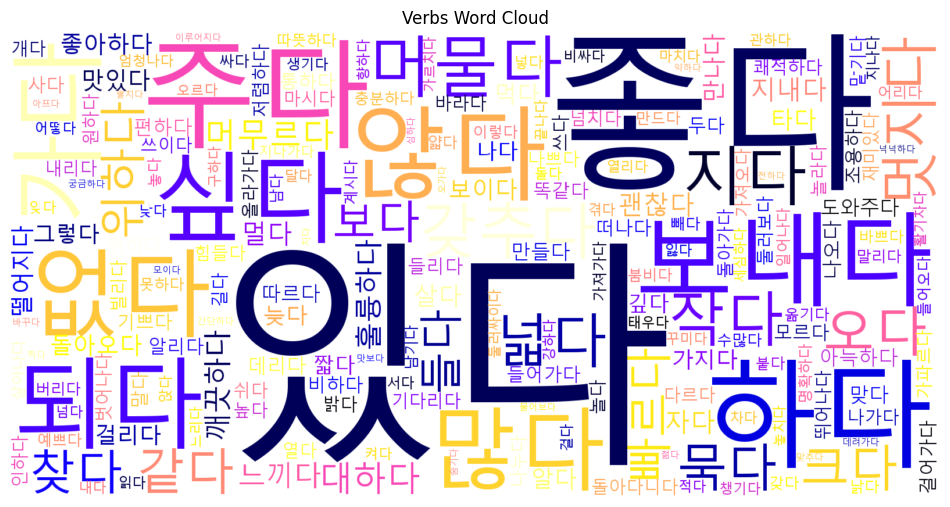

In [29]:

palettes = ['spring', 'summer', 'seismic','PuBu']

def generate_word_cloud(data, font_path, title, color=None):
    wordcloud = WordCloud(width=800, height=400,
                          max_words=200,
                          scale=2,
                          random_state=42,
                          background_color='white',
                          colormap = color,
                          font_path=font_path).generate_from_frequencies(data)

    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

font_path = 'C:/Windows/Fonts/malgun.ttf'
generate_word_cloud(verbs_counts, font_path, 'Verbs Word Cloud', 'gnuplot2')


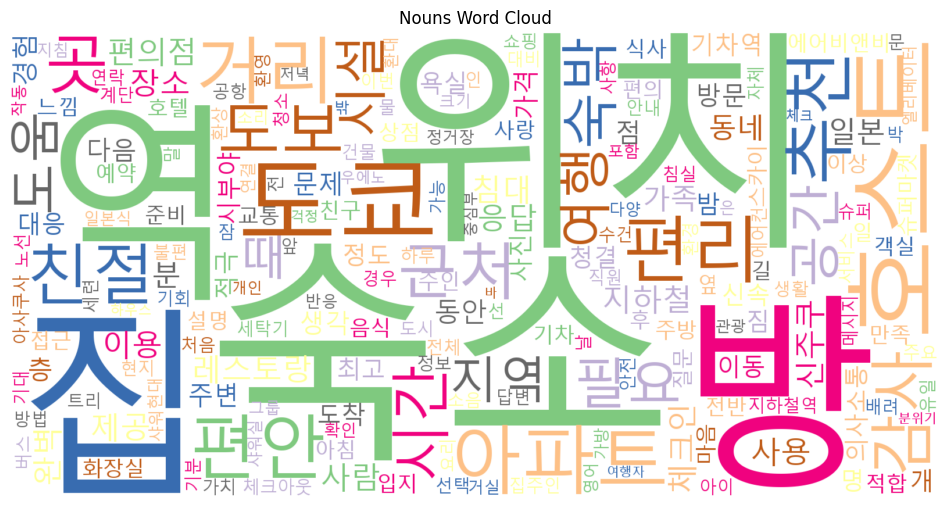

In [30]:
generate_word_cloud(nouns_counts, font_path, 'Nouns Word Cloud', 'Accent')


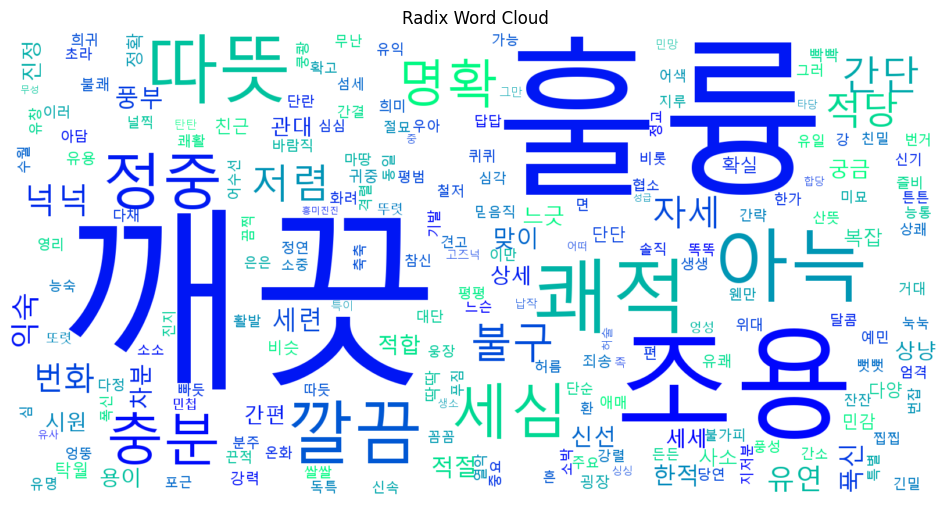

In [31]:
generate_word_cloud(radixs_counts, font_path, 'Radix Word Cloud', 'winter')


In [32]:
sorted_verbs = sorted(verbs_counts.items(), key=lambda x: x[1], reverse=True)
sorted_nouns = sorted(nouns_counts.items(), key=lambda x: x[1], reverse=True)
sorted_radixs = sorted(radixs_counts.items(), key=lambda x: x[1], reverse=True)


In [33]:
import plotly.graph_objects as go

def generate_treemap(labels, values, title):
    fig = go.Figure(go.Treemap(
        labels=labels[:30],  # You can adjust the number of labels displayed
        parents=[''] * len(labels[:30]),
        values=values,
        texttemplate="%{label}<br>%{value}",
        hoverinfo='label+value',
    ))

    fig.update_layout(
        title=title,
        margin=dict(l=10, r=10, t=40, b=10),  # Adjust margins for better layout
    )

    fig.show()


label, counts = zip(*sorted_verbs)

generate_treemap(label, counts, 'Ingredient Frequency Treemap')


In [34]:
label, counts = zip(*sorted_nouns)

generate_treemap(label, counts, 'Ingredient Frequency Treemap')

In [35]:
label, counts = zip(*sorted_radixs)

generate_treemap(label, counts, 'Ingredient Frequency Treemap')

###  감성 사전 만들기

In [36]:
print(f'Verb 의 개수 : {len(sorted_verbs)}')
print(f'Noun 의 개수 : {len(sorted_nouns)}')
print(f'Radix 의 개수 : {len(sorted_radixs)}')  

Verb 의 개수 : 1716
Noun 의 개수 : 22019
Radix 의 개수 : 458


#### 어근을 변형해 부정, 긍정 문장을 생성하고 점수를 입력하는 코드  생성
임시적으로 부정어에는 마이너스 점수를 할당한다 

In [37]:
def generate_variations(root_word):
    variations = []
    scores = []
    
    variations.append(root_word + "하게")
    scores.append(1)
    variations.append(root_word + "한")
    scores.append(1)
    variations.append(root_word + "하다")
    scores.append(2)
    variations.append(root_word + "하고")
    scores.append(2) 
    variations.append(root_word + "하며")
    scores.append(2)
    variations.append(root_word + "하지 않다")
    scores.append(-2)
    variations.append(root_word + "하지 않게")
    scores.append(-2)
    variations.append(root_word + "하지 않은")
    scores.append(-2)
    variations.append(root_word + "하지 않고")
    scores.append(-2)
    variations.append(root_word + "하지 않으며")
    scores.append(-2)
    variations.append(root_word + "안한")
    scores.append(-2)
    
    return variations, scores


In [38]:
def save_to_file(data, file_path):
    with open(file_path, 'w', encoding='utf-8') as file:
        for _, row in data.iterrows():
            file.write(f"{row['label']} {row['score']}\n")

def split_label_score(data, file_name, isRadix=False):
    word_list, _ = zip(*data)
    word_list = list(word_list)
    score_list = []

    if isRadix:
        new_word_list = []
        new_score_list = []
        for word in word_list:
            variations, scores = generate_variations(word)
            new_word_list.extend(variations)
            new_score_list.extend(scores)
        word_list = new_word_list
        score_list = new_score_list
    else:
        score_list = [0] * len(word_list)

    score_df = pd.DataFrame({
        'label': word_list,
        'score': score_list
    })

    file_path = f"{file_name}.txt"
    save_to_file(score_df, file_path)

    score_df.to_csv(f'{file_name}_sentiword_score.csv')

    
    
    return score_df


In [39]:
split_label_score(sorted_radixs, 'radix', isRadix = True)

,label,score
0,깨끗하게,1
1,깨끗한,1
2,깨끗하다,2
3,깨끗하고,2
4,깨끗하며,2
...,...,...
5033,불길하지 않게,-2
5034,불길하지 않은,-2
5035,불길하지 않고,-2
5036,불길하지 않으며,-2


#### 긍정 단어와 부정 단어에 대한 점수 할당이 반대로 되어야하므로 나머지는 하드코딩하며 수정해준다

------
#### 반대로 할당 
- 딱딱 
- 불쾌
- 빡빡
- 엄격
- 번잡
- 예민
- 지저분
- 답답
- 끔찍
- 지루
- 어수선
- 심각 
- 심
- 흔
- 퀴퀴
- 분주
- 축축 
- 협소
- 빠듯
- 심심
- 눅눅
- 열악 
- 쌀쌀
- 허름
- 찝찝
- 끈적
- 쿵쾅
--------
#### 제거 & 애메 
- 면 -> 제거 
- 그러 ->제거
- 아담 -> 애매 
- 이러 -> 제거 
- 평범 -> 애매 
- 죄송 -> 제거 
- 번거 -> 제거 
- 간략/간소 -> 애매
- 엉뚱 -> 애매 

In [227]:
file_path = "radix.txt"  

with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()

for line in lines[:20]:
    print(line.strip())  


깨끗하게 1
깨끗한 1
깨끗하다 2
깨끗하고 2
깨끗하며 2
깨끗하지 않다 -2
깨끗하지 않게 -2
깨끗하지 않은 -2
깨끗하지 않고 -2
깨끗하지 않으며 -2
깨끗안한 -2
훌륭하게 1
훌륭한 1
훌륭하다 2
훌륭하고 2
훌륭하며 2
훌륭하지 않다 -2
훌륭하지 않게 -2
훌륭하지 않은 -2
훌륭하지 않고 -2


In [194]:
radix_list,_ = zip(*sorted_radixs)

radix_list = list(radix_list)
score_list = [0] * len(radix_list)

radix_df = pd.DataFrame({
    'label' : radix_list,
    'score' : score_list
})


file_path = "radix_df.txt"  # You can change the file name and path as needed

with open(file_path, 'w', encoding='utf-8') as file:
    for _, row in radix_df.iterrows():
        file.write(f"{row['label']} {row['score']}\n")
